In [1]:
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import re
import tkinter as tk
from tkinter import filedialog
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Smriti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Smriti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Use Tkinter to select the file
root = tk.Tk()
root.withdraw()  # Hide the main window
file_path = filedialog.askopenfilename()
print("Selected file:", file_path)

column_names = ['Target', 'ID', 'Date', 'Flag', 'User', 'Comments']

# Attempt to load the CSV file with different encodings
encodings = [ 'ISO-8859-1']
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, names=column_names, header=None, encoding=encoding)
        print(f"File successfully read with encoding {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Error with encoding {encoding}: {e}")


Selected file: D:/Application Of AI/AAI202LastNameFirstNameBrief2/Assignment2-Dataset.csv
File successfully read with encoding ISO-8859-1


In [3]:
print(df.head())

   Target          ID                          Date      Flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              User                                           Comments  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [4]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1048576, 6)


In [5]:
# Prints a concise summary of the DataFrame, including data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Target    1048576 non-null  int64 
 1   ID        1048576 non-null  int64 
 2   Date      1048576 non-null  object
 3   Flag      1048576 non-null  object
 4   User      1048576 non-null  object
 5   Comments  1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB
None


In [6]:
# Prints summary statistics of the DataFrame's numerical columns
print(df.describe())

             Target            ID
count  1.048576e+06  1.048576e+06
mean   9.482422e-01  1.976166e+09
std    1.701120e+00  2.300584e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.824526e+09
50%    0.000000e+00  1.990869e+09
75%    0.000000e+00  2.198903e+09
max    4.000000e+00  2.329206e+09


In [7]:
 # Prints the count of missing values in each column of the DataFrame
print(df.isnull().sum())

Target      0
ID          0
Date        0
Flag        0
User        0
Comments    0
dtype: int64


In [8]:
# Check unique values in the 'Target' column
print("Unique values in 'Target' column:", df['Target'].unique())

Unique values in 'Target' column: [0 4]


In [9]:
# Count the occurrences of each unique value
print("Value counts in 'Target' column:")
print(df['Target'].value_counts())

Value counts in 'Target' column:
Target
0    800000
4    248576
Name: count, dtype: int64


In [10]:
# Map target values: 0 (negative) and 1 (positive)
df['Target'] = df['Target'].map({0: 0, 4: 1})

# Verify the mapping
print("Mapped values in 'Target' column:", df['Target'].unique())
print("Mapped value counts in 'Target' column:")
print(df['Target'].value_counts())

Mapped values in 'Target' column: [0 1]
Mapped value counts in 'Target' column:
Target
0    800000
1    248576
Name: count, dtype: int64


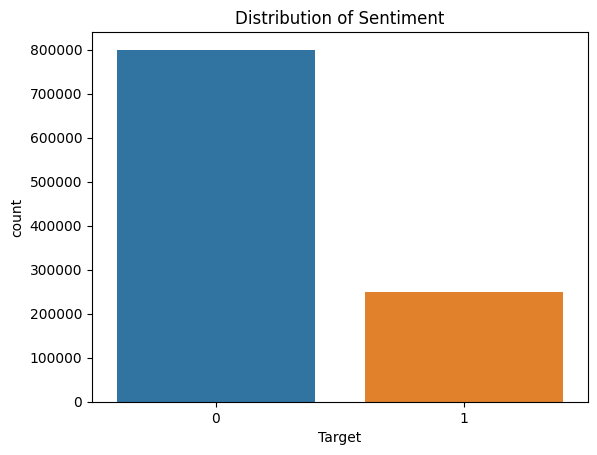

In [11]:
# Plot the distribution again
sns.countplot(x='Target', data=df)
plt.title('Distribution of Sentiment')
plt.show()


In [12]:
def clean_text(text):
     # Convert text to lowercase
    text = text.lower() 
    # Remove URLs with more variations
    text = re.sub(r'http\S+|www.\S+|https?\S+|ftp\S+|\S+\.\S+', '', text) 
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)  
    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
    # Remove newlines
    text = re.sub(r'\n', '', text)  
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text) 
    # Replace repeating characters with two characters
    text = re.sub(r'(.)\1+', r'\1\1', text)  
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

In [13]:
# Display a few sample rows before preprocessing
print("Before preprocessing:")
print(df['Comments'].head(20))

Before preprocessing:
0     @switchfoot http://twitpic.com/2y1zl - Awww, t...
1     is upset that he can't update his Facebook by ...
2     @Kenichan I dived many times for the ball. Man...
3       my whole body feels itchy and like its on fire 
4     @nationwideclass no, it's not behaving at all....
5                         @Kwesidei not the whole crew 
6                                           Need a hug 
7     @LOLTrish hey  long time no see! Yes.. Rains a...
8                  @Tatiana_K nope they didn't have it 
9                             @twittera que me muera ? 
10          spring break in plain city... it's snowing 
11                           I just re-pierced my ears 
12    @caregiving I couldn't bear to watch it.  And ...
13    @octolinz16 It it counts, idk why I did either...
14    @smarrison i would've been the first, but i di...
15    @iamjazzyfizzle I wish I got to watch it with ...
16    Hollis' death scene will hurt me severely to w...
17                        

In [14]:
# Apply preprocessing to the 'Comments' column
df['Comments'] = df['Comments'].apply(clean_text)
# Explicitly remove any remaining problematic characters
df['Comments'] = df['Comments'].str.replace('', '', regex=False)
# Display a few sample rows after preprocessing
print("After preprocessing:")
print(df['Comments'].head(20))

After preprocessing:
0     switchfoot  aww thats a bummer  you shoulda go...
1     is upset that he cant update his facebook by t...
2     kenichan i dived many times for the ball manag...
3       my whole body feels itchy and like its on fire 
4     nationwideclass no its not behaving at all im ...
5                          kwesidei not the whole crew 
6                                           need a hug 
7     loltrish hey  long time no see  rains a bit on...
8                     tatianak nope they didnt have it 
9                               twittera que me muera  
10                  spring break in plain  its snowing 
11                            i just repierced my ears 
12    caregiving i couldnt bear to watch it  and i t...
13     it it counts idk why i did either you never t...
14    smarrison i wouldve been the first but i didnt...
15    iamjazzyfizzle i wish i got to watch it with y...
16    hollis death scene will hurt me severely to wa...
17                         

In [15]:
# Define and apply the preprocessing function
stop_words = set(stopwords.words('english')) # Define the set of stopwords
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text # Lemmatizes and removes stopwords from the input text
  # Apply the preprocessing function to the 'Comments' column
df['Comments'] = df['Comments'].apply(preprocess_text)

In [16]:
# Display a few sample rows after preprocessing
print("After preprocessing:")
print(df['Comments'].head(10))

After preprocessing:
0    switchfoot aww thats bummer shoulda got david ...
1    upset cant update facebook texting might cry r...
2    kenichan dived many time ball managed save res...
3                      whole body feel itchy like fire
4             nationwideclass behaving im mad cant see
5                                  kwesidei whole crew
6                                             need hug
7    loltrish hey long time see rain bit bit lol im...
8                                  tatianak nope didnt
9                                   twittera que muera
Name: Comments, dtype: object


In [17]:
 # Display the first 20 rows after preprocessing
print("More rows after preprocessing:")
print(df['Comments'].head(20)) 


More rows after preprocessing:
0     switchfoot aww thats bummer shoulda got david ...
1     upset cant update facebook texting might cry r...
2     kenichan dived many time ball managed save res...
3                       whole body feel itchy like fire
4              nationwideclass behaving im mad cant see
5                                   kwesidei whole crew
6                                              need hug
7     loltrish hey long time see rain bit bit lol im...
8                                   tatianak nope didnt
9                                    twittera que muera
10                           spring break plain snowing
11                                        repierced ear
12    caregiving couldnt bear watch thought ua loss ...
13                  count idk either never talk anymore
14    smarrison wouldve first didnt gun really thoug...
15    iamjazzyfizzle wish got watch miss iamlilnicki...
16    hollis death scene hurt severely watch film wr...
17               

In [18]:
# Check for specific elements (URLs) using a refined regex
url_pattern = r'\bhttps?://\S+|www\.\S+|ftp://\S+|\S+\.\S+'
# Filter the 'Comments' column to find any rows containing URLs
urls_remaining = df['Comments'][df['Comments'].str.contains(url_pattern, regex=True)]

# Print the rows containing URLs if any are found; otherwise, print a message indicating no URLs were found
if not urls_remaining.empty:
    print("Rows with remaining URLs:")
    print(urls_remaining)
else:
    print("No remaining URLs found.")


No remaining URLs found.


In [19]:
# Check for punctuation using a refined regex
punctuation_remaining = df['Comments'][df['Comments'].str.contains(r'[^\w\s]', regex=True)]

# Print the rows containing punctuation or special characters if any are found; otherwise, print a message indicating none were found
if not punctuation_remaining.empty:
    print("Rows with remaining punctuation or special characters:")
    print(punctuation_remaining)
else:
    print("No remaining punctuation or special characters found.")


No remaining punctuation or special characters found.


In [20]:
# Assertions to check if URLs and punctuation are completely removed
assert df['Comments'].str.contains(url_pattern, regex=True).sum() == 0, "URLs not completely removed"
assert df['Comments'].str.contains(r'[^\w\s]', regex=True).sum() == 0, "Punctuation or special characters not completely removed"

In [21]:
# Concatenate all positive comments into a single string
positive_comments = ' '.join(df[df['Target'] == 1]['Comments'])

# Concatenate all negative comments into a single string
negative_comments = ' '.join(df[df['Target'] == 0]['Comments'])


In [22]:
# Generate a word cloud for positive comments
wordcloud_positive = WordCloud(width=800, height=400, max_words=200).generate(positive_comments)

# Generate a word cloud for negative comments
wordcloud_negative = WordCloud(width=800, height=400, max_words=200).generate(negative_comments)


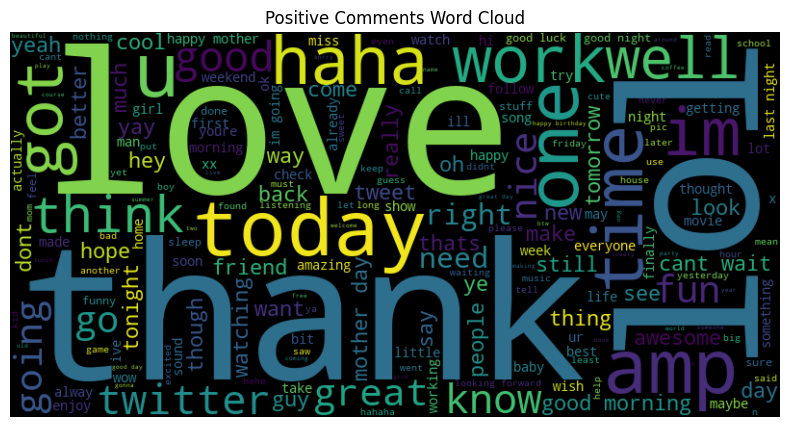

In [23]:
# Plot the word cloud for positive comments
plt.figure(figsize=(10, 5))  # Set the figure size
plt.imshow(wordcloud_positive, interpolation='bilinear')  # Display the word cloud image with bilinear interpolation
plt.title('Positive Comments Word Cloud')  # Set the title of the plot
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot


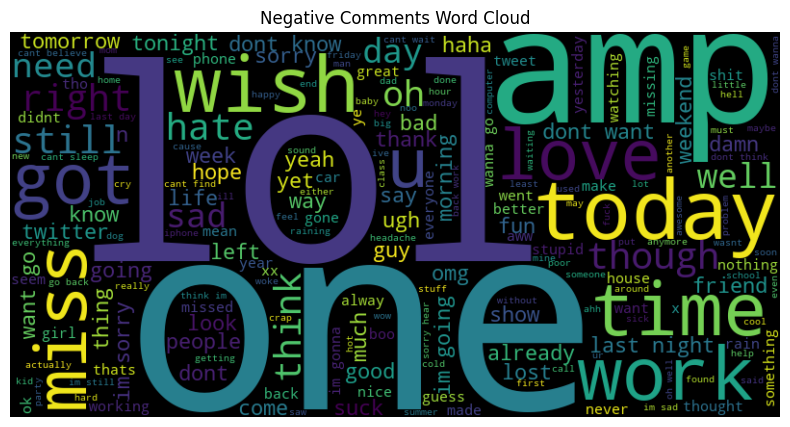

In [24]:
# Plot the word cloud for negative comments
plt.figure(figsize=(10, 5))  # Set the figure size
plt.imshow(wordcloud_negative, interpolation='bilinear')  # Display the word cloud image with bilinear interpolation
plt.title('Negative Comments Word Cloud')  # Set the title of the plot
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot


In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df['Comments']  # Feature variable: comments
y = df['Target']  # Target variable: labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split with 70% for training and 30% for testing



In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform the text data using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Initialize TF-IDF vectorizer with a maximum of 5000 features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transform the test data using the fitted vectorizer


In [27]:
# Inspect the TF-IDF output
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")  # Print the shape of the transformed training data
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")  # Print the shape of the transformed test data


Shape of X_train_tfidf: (734003, 5000)
Shape of X_test_tfidf: (314573, 5000)


In [28]:
# Get and inspect the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Number of features: {len(feature_names)}")  # Print the total number of features
print(f"First 20 features: {feature_names[:20]}")  # Print the first 20 features


Number of features: 5000
First 20 features: ['aa' 'aah' 'aahh' 'aand' 'aargh' 'aaron' 'aaw' 'ab' 'abandoned' 'abc'
 'ability' 'abit' 'able' 'absolute' 'absolutely' 'abt' 'abuse' 'ac'
 'accent' 'accept']


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Train a Logistic Regression model
model = LogisticRegression()  # Initialize the Logistic Regression model
model.fit(X_train_tfidf, y_train)  # Train the model on the training data
y_pred = model.predict(X_test_tfidf)  # Make predictions on the test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f'Accuracy: {accuracy}')  # Print the accuracy


Accuracy: 0.8306021177914188


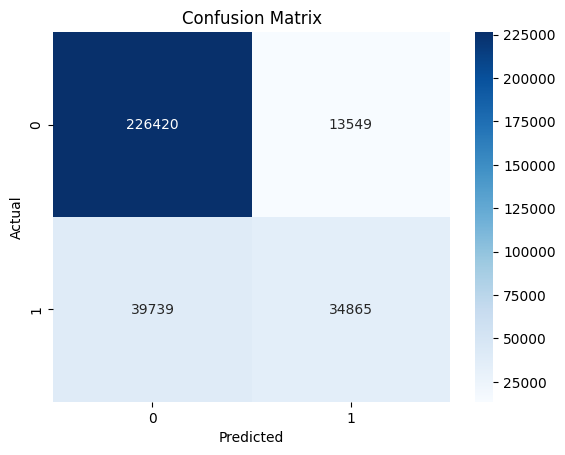

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Red')  # Create a heatmap of the confusion matrix
plt.title('Confusion Matrix')  # Set the title of the plot
plt.xlabel('Predicted')  # Label the x-axis as 'Predicted'
plt.ylabel('Actual')  # Label the y-axis as 'Actual'
plt.show()  # Display the plot


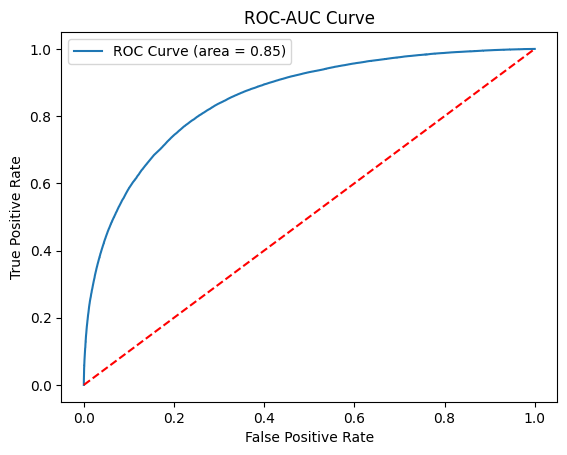

In [31]:
# Compute the probabilities of the positive class
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')  # Plot the ROC curve with the ROC-AUC score
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Plot a diagonal line for reference
plt.xlabel('False Positive Rate')  # Label the x-axis as 'False Positive Rate'
plt.ylabel('True Positive Rate')  # Label the y-axis as 'True Positive Rate'
plt.title('ROC-AUC Curve')  # Set the title of the plot
plt.legend()  # Display the legend
plt.show()  # Display the plot


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['lbfgs', 'liblinear'],  # Solver algorithm
    'max_iter': [100, 200]  # Maximum number of iterations
}


In [33]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters found: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8300674514204079


In [34]:
# Train the best model on the full training set
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_best = best_logreg.predict(X_test_tfidf)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy of the best model: {accuracy_best}')

Accuracy of the best model: 0.8305862232295842


XGBoost Accuracy: 0.8054600998814265


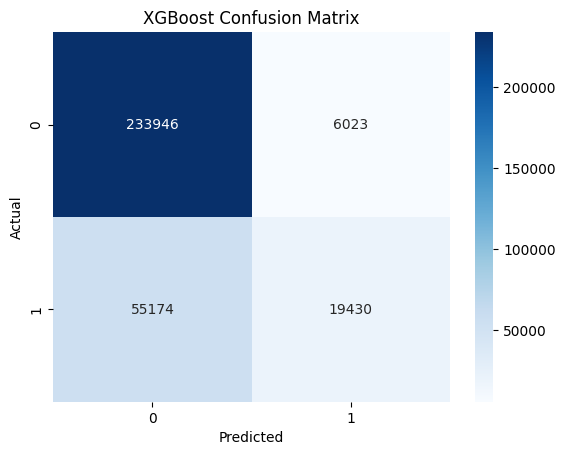

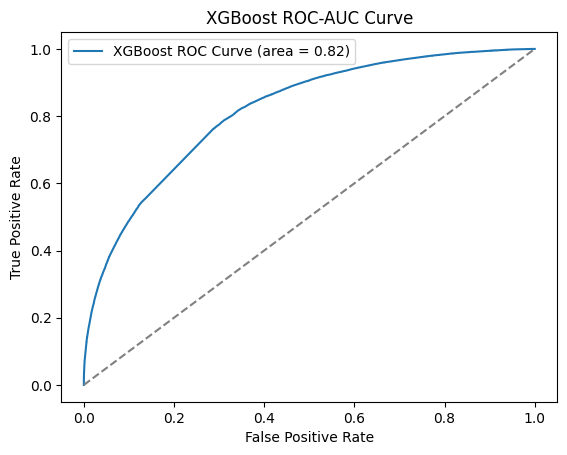

In [35]:
'''This one is just to see how well the data perform in other algorithm'''
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# Train an XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')

# Compute the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute the ROC-AUC score
y_pred_prob_xgb = xgb_model.predict_proba(X_test_tfidf)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)

# Plot the ROC curve
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC Curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC-AUC Curve')
plt.legend()
plt.show()
